## 1. Персептрон (感知机)

- Персептрон — базовый элемент нейронных сетей  (感知机是神经网络的基本单元)

- Персептрон принимает несколько входных сигналов и формирует один выходной  (感知机会接收多个输入信号，并生成一个输出信号)

- Каждому входу соответствует вес w, который отражает важность сигнала  (每个输入都对应一个权重 w，用于反映该信号的重要性)

- Чем больше вес, тем значимее соответствующий сигнал (权重越大，对应信号的重要性就越高)

### 1.1 Математическое представление персептрона (感知机的数学表达)

- Нейрон вычисляет взвешенную сумму входов: $w_1x_1+w_2x_2$ и сравнивает её с пороговым значением $\theta$.  
神经元计算输入的加权和：$w_1x_1+w_2x_2$，并将其与阈值 $\theta$ 比较。

- Если сумма превышает порог, нейрон активируется ($y = 1$); иначе остаётся в неактивном состоянии ($y = 0$).  
如果加权和超过阈值，神经元就会被激活（$y = 1$）；否则保持不激活状态（$y = 0$）。

$$
y = \begin{cases}
    0, & \text{if } w_1x_1 + w_2x_2 \leq \theta \\
    1, & \text{if } w_1x_1 + w_2x_2 > \theta
\end{cases}
$$

In [1]:
w1 = 1.0
w2 = 1.0
theta = 1.5  # порог (阈值)

def perceptron(x1: int, x2: int) -> int:
    s = w1 * x1 + w2 * x2          # взвешенная сумма 加权和
    return 1 if s > theta else 0   # активация 激活函数

inputs = [(0, 0), (1, 0), (0, 1), (1, 1)]

print("x1  x2  y")
for x1, x2 in inputs:
    y = perceptron(x1, x2)
    print(f"{x1}   {x2}   {y}")

x1  x2  y
0   0   0
1   0   0
0   1   0
1   1   1


#### 1.1.1 Логический элемент И (AND gate) (逻辑“与”门)

- Элемент И имеет два входа и один выход  
  “与”门有两个输入和一个输出

- Он выдаёт 1, только если оба входа равны 1  
  只有当两个输入都等于 1 时，它才输出 1

- Такое соответствие между входами и выходом представлено в таблице истинности:  
  这种输入与输出之间的对应关系可用真值表表示：

| $x_1$ | $x_2$ | $y$ |
|:------:|:------:|:-----:|
|   0    |   0    |   0   |
|   1    |   0    |   0   |
|   0    |   1    |   0   |
|   1    |   1    |   1   |

**Задача:** подобрать такие параметры $w_1$, $w_2$, $\theta$, чтобы персептрон реализовывал поведение элемента И (AND).
**任务：** 调整参数 $w_1$, $w_2$, $\theta$，使感知机实现逻辑“与”门的功能。

**Ключевое условие**: взвешенная сумма входов должна превышать порог $\theta$ только тогда, когда оба входа активны (x1 = 1 и x2 = 1).  
**关键条件：** 只有当两个输入都为 1 时，加权和才应超过阈值 $\theta$。

#### 1.1.2 Логический элемент НЕ–И (NAND gate) (逻辑“非与”门)

- Элемент НЕ–И инвертирует результат И элемента.  
  “非与”门（NAND）会将“与”门的结果取反。

- Он выдаёт 1 во всех случаях, кроме $x_1 = x_2 = 1$.  
  除了 $x_1 = x_2 = 1$ 的情况外，其余所有情况输出都是 1。

- Соответствие входов и выхода отражено в таблице истинности:  
  输入与输出之间的对应关系如下真值表所示：

|  $x_1$  |  $x_2$  |  $y$  |
|:-------:|:-------:|:-----:|
|   0     |   0     |   1   |
|   1     |   0     |   1   |
|   0     |   1     |   1   |
|   1     |   1     |   0   |


**Задача:** подобрать такие параметры $w_1$, $w_2$, $\theta$, чтобы персептрон реализовывал поведение элемента НЕ-И (NAND).  
**任务：** 调整参数 $w_1$, $w_2$, $\theta$，使感知机实现逻辑“非与”门的功能。

**Ключевое условие**: взвешенная сумма входов не должна превышать порог $\theta$ только при обоих активных входах (x1 = 1 и x2 = 1).  
**关键条件：** 只有当两个输入都为 1 时，加权和才不应超过阈值 $\theta$。

#### 1.1.3 Логический элемент ИЛИ (OR gate) (逻辑“或”门)

- Элемент **ИЛИ** возвращает 1, если *хотя бы один* из входов активен.  
  “或”门只要有 至少一个输入为 1，输出就是 1。

- Он выдаёт 0 только при $x_1 = x_2 = 0$; во всех остальных случаях результат равен $1$.  
  只有在 $x_1 = x_2 = 0$ 时输出为 0；其余情况下输出均为 1。

- Поведение ИЛИ элемента представлено в таблице истинности:  
  OR 门的行为如以下真值表所示：

|  $x_1$  |  $x_2$  |  $y$  |
|:-------:|:-------:|:-----:|
|   0     |   0     |   0   |
|   1     |   0     |   1   |
|   0     |   1     |   1   |
|   1     |   1     |   1   |

**Задача:** подобрать такие параметры $w_1$, $w_2$, $\theta$, чтобы персептрон реализовывал поведение элемента ИЛИ (OR).  
**任务：** 调整参数 $w_1$, $w_2$, $\theta$，使感知机实现逻辑“或”门的功能。

**Ключевое условие**: взвешенная сумма входов должна превышать порог $\theta$ во всех случаях, кроме (x1 = x2 = 0).  
**关键条件：** 除了 $x_1 = x_2 = 0$ 的情况外，所有情况下加权和都必须超过阈值 $\theta$。

### 1.2 Машинное обучение (机器学习)

- Параметры персептрона (веса и порог) выше подбирали мы сами — вручную, глядя на таблицу истинности.  
  以上的感知机的参数（权重和阈值）是我们自己根据真值表手动选出来的。  

- В этом случае человек выбирает параметры на основе знания задачи.  
  在这种情况下，是人根据对任务的理解来选择合适的参数。  

- Однако в машинном обучении основная задача — научить компьютер находить подходящие параметры самостоятельно.  
  然而，在机器学习中，核心目标是让计算机自己学会寻找合适的参数。  

- **Обучение** означает процесс автоматического подбора параметров модели (персептрона), чтобы она соответствовала данным.  
  “学习”指的是：自动调整模型（感知机）的参数，使其能够匹配训练数据的过程。  

- Задача человека — задать структуру модели и передать машине данные.  
  人的任务是：设计好模型结构，并把数据交给机器。  

- Таким образом: И, ИЛИ и НЕ–И можно реализовать с помощью одного и того же персептрона, меняя только значения весов и порога.  
  因此：逻辑“与”(AND)、“或”(OR) 和 “非与”(NAND) 都可以用同一个感知机来实现，只需要改变权重和阈值的取值。


### 1.3 Введение смещения (bias) в персептрон  (在感知机中引入偏置)

Для удобства мы вводим смещение (bias) $b = -\theta$, и переписываем формулу в более универсальном виде:  
为了方便，我们引入偏置（bias）$b = -\theta$，并将原公式改写成更通用的形式：

$$
y =
\begin{cases}
1, & \text{if }\, w_1 x_1 + w_2 x_2 + b > 0, \\
0, & \text{else}.
\end{cases}
$$

$w_1$, $w_2$ --- отвечают за важность каждого входа  (决定每个输入信号的重要性)

$b$ --- определяет, насколько легко нейрон активируется в целом (决定神经元整体上多容易被激活)

- Если $b = -0.1$, достаточно, чтобы сумма входов чуть превышала $0.1$ — и нейрон сработает. (如果 $b = -0.1$，只要加权和稍微超过 $0.1$，神经元就会被激活)

- Если же $b = -20.0$, активация произойдёт только при очень сильных сигналах. (而如果 $b = -20.0$，只有在信号非常强时才会发生激活)

Таким образом, $b$ задаёт общий уровень чувствительности нейрона, независимо от отдельных весов.  
(因此，$b$ 决定了神经元的整体敏感度，而不依赖于某个单独权重的具体取值)

### 1.4 Исключающее ИЛИ (XOR) (异或门)

- XOR (исключающее «или») выдаёт 1 только тогда, когда **ровно один** из входов равен 1.  
  异或门（XOR）只有在**恰好一个**输入为 1 时输出 1。

- Четыре точки данных $(0, 0)$, $(1, 0)$, $(0, 1)$, $(1, 1)$ невозможно разделить одной прямой, поэтому пространство не является линейно разделимым.  
  对于四个数据点 $(0, 0)$、$(1, 0)$、$(0, 1)$、$(1, 1)$，不可能用一条直线将类别完全分开，因此这个任务在原始空间中**不是线性可分的**。

Для нелинейных задач, таких как XOR, требуется многослойная нейронная сеть, способная формировать произвольные — в том числе криволинейные — разделяющие поверхности.  
对于像 XOR 这样的**非线性任务**，需要使用**多层神经网络**，使其能够构造出任意形状的分割边界，包括**弯曲的（非线性）决策边界**。


In [2]:
import numpy as np

def step(x):
    return 1 if x > 0 else 0

def xor_perceptron(x1, x2):
    # ---- скрытый слой ----
    h1 = step(1 * x1 + 1 * x2 - 0.5)   #  h1: OR,  порог 0.5
    h2 = step(1 * x1 + 1 * x2 - 1.5)   # h2: AND,  порог 1.5

    # ---- выходной слой ----
    s = 1 * h1 + (-2) * h2 - 0.5       # y = h1 AND (NOT h2)
    y = step(s)
    return y

# проверяем 4 входа XOR
inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
print("x1  x2  ->  y")
for x1, x2 in inputs:
    print(x1, " ", x2, " -> ", xor_perceptron(x1, x2))

x1  x2  ->  y
0   0  ->  0
0   1  ->  1
1   0  ->  1
1   1  ->  0


## 2. Нейронные сети (神经网络)

- В предыдущей главе мы изучили персептрон.  
  在上一章中，我们学习了感知机。

- Хорошая новость — даже сложные функции можно выразить с его помощью.  
  好消息是：即使是复杂的函数，也可以用感知机来表示。

- Плохая новость — веса приходилось подбирать **вручную**.  
  坏消息是：之前我们必须**手动**挑选权重参数。


Нейронные сети были придуманы, чтобы решить эту проблему.  
神经网络正是为了解决这个问题而被提出的。

Их главное преимущество — **способность обучаться автоматически**.  
它们最大的优势在于：**能够自动学习**。

Нейрон получает два входных сигнала $x_1$ и $x_2$, и выдаёт выходной сигнал $y$.  
神经元接收两个输入信号 $x_1$ 和 $x_2$，并产生一个输出信号 $y$。
$$
a = b + w_1x_1 +w_2x_2
$$
$$
y = h(a) = \begin{cases}
0, & a \leq 0 \\
1, & a > 0
\end{cases}
$$

Функция $h(a)$ называется \textbf{функцией активации} (activation function), так как она «активирует» или «тормозит» нейрон в зависимости от входной суммы.  
函数 $h(a)$ 被称为**激活函数**（activation function），因为它会根据输入总和来“激活”或“抑制”神经元。

Ранее в модели персептрона использовалась ступенчатая функция активации —  
она мгновенно «включает» нейрон, если входное значение превышает порог.  
在之前的感知机模型中使用的是阶跃激活函数 —— 当输入超过阈值时，它会瞬间“打开”神经元。

Но что будет, если заменить ступенчатую функцию на другую?  
如果我们把这种阶跃函数替换成别的函数，会发生什么呢？

Именно так работает нейронная сеть: если заменить **жёсткую** функцию $h(x)$ на более гладкую, мы получим **гибкую** модель — нейронную сеть.  
这正是神经网络的运行方式：如果将**硬性**的激活函数 $h(x)$ 替换成更**平滑**的函数，我们就能得到一个更加灵活的模型 —— 这就是神经网络。

Сигмоида (Sigmoid) — одна из самых популярных функций активации:  
Sigmoid 是最常用的激活函数之一： 
$$
h(x) = \frac{1}{1 + \exp(-x)}
$$

Благодаря этой функции сигнал может быть частично активирован и передан дальше по сети.  
由于这种函数，信号可以被**部分激活**并继续向网络的下一层传递。

Именно наличие таких активационных функций отличает нейросети от обычных персептронов.  
正是因为有了这些激活函数，神经网络才与传统的感知机不同。


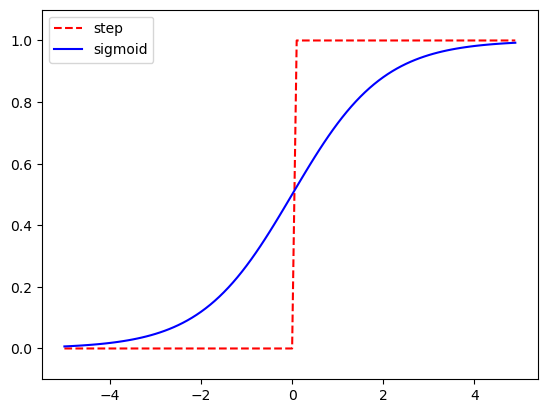

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step(x):
    return np.array(x > 0, dtype=int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5, 5, 0.1)
y1 = step(x)
y2 = sigmoid(x)

plt.plot(x, y1, '--r', label='step')
plt.plot(x, y2, 'b', label='sigmoid')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

### 2.1 Реализация простой нейросети (简单神经网络的实现)

#### 2.1.1 Умножение матриц (矩阵乘法)

In [9]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])
print("Shape of matrix A:", A.shape)

B = np.array([[5, 6],
              [7, 8]])
print("Shape of matrix B:", B.shape)

C = np.dot(A, B)
print(C)

Shape of matrix A: (2, 2)
Shape of matrix B: (2, 2)
[[19 22]
 [43 50]]


#### 2.1.2 Реализация нейросети через умножение матриц  
**通过矩阵乘法实现神经网络**
$$
\mathbf{X} \cdot \mathbf{W} = \mathbf{Y}
$$

In [10]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


### 2.2 Реализация 3-х слойной нейронной сети (三层神经网络的实现)

От слоя 0 к слою 1, взвешенную сумму на первом скрытом слое можно выразить как  
从第 0 层到第 1 层，第一隐藏层的加权和可表示为：

$$
A^{(1)} = X W^{(1)} + B^{(1)}
$$

Матрицы имеют вид:  
各矩阵形式如下：

$$
A^{(1)} =
\begin{pmatrix}
a^{(1)}_1 & a^{(1)}_2 & a^{(1)}_3
\end{pmatrix},
\quad
X =
\begin{pmatrix}
x_1 & x_2
\end{pmatrix},
\quad
B^{(1)} =
\begin{pmatrix}
b^{(1)}_1 & b^{(1)}_2 & b^{(1)}_3
\end{pmatrix}
$$

Матрица весов первого слоя:  
第一层权重矩阵：

$$
W^{(1)} =
\begin{pmatrix}
w^{(1)}_{11} & w^{(1)}_{21} & w^{(1)}_{31} \\
w^{(1)}_{12} & w^{(1)}_{22} & w^{(1)}_{32}
\end{pmatrix}
$$

Затем к результату $A^{(1)}$ применяется функция активации,  
чтобы получить выход $Z^{(1)}$.  
然后对 $A^{(1)}$ 使用激活函数以获得输出 $Z^{(1)}$：

$$
Z^{(1)} = h(A^{(1)})
$$

Точно так же вычисляется следующий слой:  
同样地，可以计算下一层：

$$
A^{(2)} = Z^{(1)} W^{(2)} + B^{(2)}, \qquad
Z^{(2)} = h(A^{(2)})
$$

$$
A^{(3)} = Z^{(2)} W^{(3)} + B^{(3)}, 
\qquad
Y = h(A^{(3)})
$$


In [6]:
import numpy as np

# 1. Входные данные X (один объект, два признака) 输入 X（一个样本，两个特征）
X = np.array([[0.5, 1.0]])  # shape: (1, 2)

# 2. Параметры сети (веса и смещения) 网络参数（权重和偏置）

# Слой 1: 2 -> 3 
W1 = np.array([
    [0.2, -0.5, 1.0],   # веса от x1
    [0.7,  0.3, -1.2],  # веса от x2
])

B1 = np.array([[0.1, -0.2, 0.0]])

# Слой 2: 3 -> 2
W2 = np.array([
    [0.4, -0.3],
    [-0.8, 0.6],
    [0.5, 0.1],
])

B2 = np.array([[0.0, 0.2]])

# Слой 3: 2 -> 1
W3 = np.array([
    [1.0],
    [-1.5],
])

B3 = np.array([[0.3]]) 


# 3. Функция активации (сигмоида) 激活函数（这里用 Sigmoid）
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))


# --- 4. Прямой проход (forward pass) ---

# Слой 1
A1 = X @ W1 + B1        # A^(1) = X W^(1) + B^(1)
Z1 = sigmoid(A1)        # Z^(1) = h(A^(1))

# Слой 2
A2 = Z1 @ W2 + B2       # A^(2) = Z^(1) W^(2) + B^(2)
Z2 = sigmoid(A2)        # Z^(2) = h(A^(2))

# Слой 3
A3 = Z2 @ W3 + B3       # A^(3) = Z^(2) W^(3) + B^(3)
Y  = sigmoid(A3)        # Y = h(A^(3))

# --- 5. Печать результатов
print("X  (вход):")
print(X)
print("\nA1:", A1)
print("Z1:", Z1)

print("\nA2:", A2)
print("Z2:", Z2)

print("\nA3:", A3)
print("Y (выход сети):", Y)


X  (вход):
[[0.5 1. ]]

A1: [[ 0.9  -0.15 -0.7 ]]
Z1: [[0.7109495  0.46257015 0.33181223]]

A2: [[0.08022979 0.29743846]]
Z2: [[0.5200467  0.57381621]]

A3: [[-0.04067762]]
Y (выход сети): [[0.489832]]



В общем случае для любого слоя $l$ формулы имеют вид:  
一般来说，对于任意一层 $l$，都有：

$$
A^{(l)} = Z^{(l-1)} W^{(l)} + B^{(l)}, \qquad
Z^{(l)} = h(A^{(l)})
$$

Таким образом, каждый последующий слой вычисляется по одной и той же схеме:  
因此，每一层都按照同样的计算流程进行：
- матричное умножение  矩阵乘法
- добавление смещения (bias)  加上偏置（bias）
- применение функции активации  应用激活函数。


### 2.3 Функция активации в выходном слое (输出层的激活函数)

В выходном слое выбор функции активации зависит от задачи, которую решает сеть。  
在输出层中，激活函数的选择取决于神经网络要解决的任务类型。

#### 1 Регрессия (回归任务)

В регрессионных задачах нужно предсказывать вещественные числовые значения.  
在回归任务中，我们需要预测连续的实数值。

Обычно используют тождественную функцию (identity):  
通常使用恒等函数（identity）作为输出层激活函数：

$$
y = a
$$

Она просто передаёт значение активации на выход без изменений.  
它只是把线性变换后的结果原样传递到输出，不做任何非线性变换。

#### 2) Бинарная классификация (二分类任务)

В задачах бинарной классификации сеть выдаёт вероятность принадлежности к классу 1.  
在二分类任务中，网络输出通常表示“属于类别 1” 的概率。

В этом случае в выходном слое используют сигмоиду:  
这种情况下，输出层通常使用 Sigmoid 激活函数：

$$
y = \sigma(a) = \frac{1}{1 + e^{-a}}, \quad y \in (0, 1)
$$

Значение $y$ можно интерпретировать как вероятность класса 1.  
输出 $y$ 可以被解释为样本属于类别 1 的概率。

#### 3) Многоклассовая классификация (多分类任务)

В многоклассовой классификации нужно выбрать один из $n$ классов.  
在多分类任务中，需要从 $n$ 个类别中选出一个作为预测结果。

В этом случае на выходе используют softmax-функцию:  
此时输出层一般使用 Softmax 函数：

$$
y_k = \frac{\exp(a_k)}{\sum\limits_{i=1}^n \exp(a_i)}, \quad
\sum_{k=1}^n y_k = 1
$$

Вектор $y = (y_1, \dots, y_n)$ задаёт распределение вероятностей по классам.  
向量 $y = (y_1, \dots, y_n)$ 给出了各个类别对应的概率分布。